# F1 statistics & simulation

## Introduction

Credit:
The original version of this notebook was created by David Chevrier, Diggers.

More information: https://www.diggers-consulting.com/blog/articles/how-data-science-could-turn-felipe-massa-a-f1-world-champion

## Dataset
Data from https://ergast.com/mrd/db/#csv or https://www.kaggle.com/draeg82/exploration-of-f1-dataset/data  
F1 data from 1950 to 2019


## Prerequisites

### Changes in data files
In files drivers.csv, rename column 'url' to 'driver_url'

## 1. Initialization & creation of the activepivot session

In [1]:
import atoti as tt
import numpy as np
import pandas as pd

session = tt.create_session()

Welcome to Atoti 0.4.0.20200511082531!

By using this community edition, you agree with the license available at https://www.atoti.io/eula.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


## 2. Creation of Stores

In [2]:
driversTypes = {
    "driverId": tt.types.STRING,
}
sDrivers = session.read_csv("./f1db_csv/drivers.csv", keys=["driverId"], store_name="F1 drivers", types=driversTypes)

In [3]:
sDrivers

Store(_name='F1 drivers', _scenario='Base', _columns={'driverId': Column(name='driverId', data_type=AtotiType(java_type='string', nullable=True)), 'driverRef': Column(name='driverRef', data_type=AtotiType(java_type='string', nullable=True)), 'number': Column(name='number', data_type=AtotiType(java_type='string', nullable=True)), 'code': Column(name='code', data_type=AtotiType(java_type='string', nullable=True)), 'forename': Column(name='forename', data_type=AtotiType(java_type='string', nullable=True)), 'surname': Column(name='surname', data_type=AtotiType(java_type='string', nullable=True)), 'dob': Column(name='dob', data_type=AtotiType(java_type='LocalDate[yyyy-MM-dd]', nullable=True)), 'nationality': Column(name='nationality', data_type=AtotiType(java_type='string', nullable=True)), 'driver_url': Column(name='driver_url', data_type=AtotiType(java_type='string', nullable=True))})

In [4]:
racesTypes = {
    "raceId": tt.types.STRING,
}
sRaces = session.read_csv("./f1db_csv/races.csv", keys=['raceId'], store_name="F1 races", types=racesTypes)

In [5]:
sRaces

Store(_name='F1 races', _scenario='Base', _columns={'raceId': Column(name='raceId', data_type=AtotiType(java_type='string', nullable=True)), 'year': Column(name='year', data_type=AtotiType(java_type='int', nullable=True)), 'round': Column(name='round', data_type=AtotiType(java_type='int', nullable=True)), 'circuitId': Column(name='circuitId', data_type=AtotiType(java_type='int', nullable=True)), 'name': Column(name='name', data_type=AtotiType(java_type='string', nullable=True)), 'date': Column(name='date', data_type=AtotiType(java_type='LocalDate[yyyy-MM-dd]', nullable=True)), 'time': Column(name='time', data_type=AtotiType(java_type='string', nullable=True)), 'url': Column(name='url', data_type=AtotiType(java_type='string', nullable=True))})

In [6]:
resultsTypes = {
    "points": tt.types.DOUBLE,
    "raceId": tt.types.STRING,
    "driverId": tt.types.STRING,
}

sResults = session.read_csv("./f1db_csv/results.csv", keys=['resultId'], store_name="F1 results", types=resultsTypes)

The store has been sampled because there is more than 10000 lines in the files to load.Call Session.load_all_data()  to trigger the full load of the data.


In [7]:
sResults

Store(_name='F1 results', _scenario='Base', _columns={'resultId': Column(name='resultId', data_type=AtotiType(java_type='int', nullable=True)), 'raceId': Column(name='raceId', data_type=AtotiType(java_type='string', nullable=True)), 'driverId': Column(name='driverId', data_type=AtotiType(java_type='string', nullable=True)), 'constructorId': Column(name='constructorId', data_type=AtotiType(java_type='int', nullable=True)), 'number': Column(name='number', data_type=AtotiType(java_type='int', nullable=True)), 'grid': Column(name='grid', data_type=AtotiType(java_type='int', nullable=True)), 'position': Column(name='position', data_type=AtotiType(java_type='string', nullable=True)), 'positionText': Column(name='positionText', data_type=AtotiType(java_type='string', nullable=True)), 'positionOrder': Column(name='positionOrder', data_type=AtotiType(java_type='int', nullable=True)), 'points': Column(name='points', data_type=AtotiType(java_type='double', nullable=False)), 'laps': Column(name='laps', data_type=AtotiType(java_type='int', nullable=True)), 'time': Column(name='time', data_type=AtotiType(java_type='string', nullable=True)), 'milliseconds': Column(name='milliseconds', data_type=AtotiType(java_type='string', nullable=True)), 'fastestLap': Column(name='fastestLap', data_type=AtotiType(java_type='string', nullable=True)), 'rank': Column(name='rank', data_type=AtotiType(java_type='string', nullable=True)), 'fastestLapTime': Column(name='fastestLapTime', data_type=AtotiType(java_type='string', nullable=True)), 'fastestLapSpeed': Column(name='fastestLapSpeed', data_type=AtotiType(java_type='string', nullable=True)), 'statusId': Column(name='statusId', data_type=AtotiType(java_type='int', nullable=True))})

In [8]:
sResults.join(sDrivers,mapping={"driverId":"driverId"})
sResults.join(sRaces, mapping={"raceId": "raceId"})

In [9]:
#load_all_data necessary otherwise stores are loaded with 10000 lines max
session.load_all_data()

## 3. Cube

### Cube for Race results

In [10]:
f1cube= session.create_cube(sResults,"F1Cube")

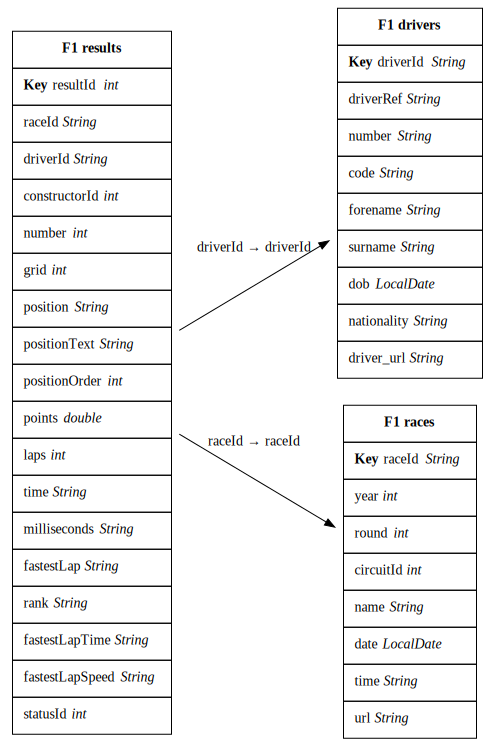

In [11]:
f1cube.schema

In [12]:
l = f1cube.levels
m = f1cube.measures
h = f1cube.hierarchies

In [13]:
session.url

'http://localhost:35525'

In [17]:
f1cube.visualize()

Install the Atoti JupyterLab extension to see this widget.

## 4. First data visualization

### dataviz1
A simple data visualization showing a table with the total number of races by driver, sorted by descending 'count' field

In [15]:
f1cube.visualize('Total number of races by driver')

Install the Atoti JupyterLab extension to see this widget.

## 5 Measures and first queries

In [19]:
f1cube.visualize()

Install the Atoti JupyterLab extension to see this widget.

### query1
A simple query that returns a dataframe with the total number of points aggregated by driver forname,surname

In [20]:
dfq1=f1cube.query(m['points.SUM'],levels=[l["forename"],l["surname"]])
dfq1

,,points.SUM
forename,surname,
Adolf,Brudes,0.0
Adolfo,Cruz,0.0
Adrian,Sutil,124.0
Adrián,Campos,0.0
Aguri,Suzuki,8.0
...,...,...
Zsolt,Baumgartner,1.0
Élie,Bayol,2.0
Éric,Bernard,10.0


### query2
A similar query with the addition of the condition parameters, used as a filter on levels (not possible as of today on the measure)

In [22]:
dfq2=f1cube.query(m['points.SUM'],levels=[l["forename"],l["surname"]],condition=l["surname"]=="Prost")
dfq2
# check data here: https://www.statsf1.com/en/alain-prost.aspx

,,points.SUM
forename,surname,
Alain,Prost,798.5


### query3
Another query returning a dataframe aggregating the Total points measure by driver and by year

In [23]:
# There is no aggregation here... maybe change it to points sum per race?

dfq3 = f1cube.query(m['points.SUM'],levels=[l["driverRef"],l["year"]])
dfq3

points.SUM
driverRef year            
Cannoc    1971         0.0
Changy    1959         0.0
abate     1963         0.0
abecassis 1951         0.0
          1952         0.0
...                    ...
zorzi     1976         0.0
          1977         1.0
zunino    1979         0.0
          1980         0.0
          1981         0.0

[3096 rows x 1 columns]

In [24]:
# You can then manipulate your dataframe like any other pandas dataframe, applying filtrer for example
#type(dfq3)
#dfq3.keys
dfq3[dfq3['points.SUM']>0]

points.SUM
driverRef  year            
adamich    1972         3.0
           1973         3.0
agabashian 1953         1.5
alan_brown 1952         2.0
albers     2005         4.0
...                     ...
wurz       2005         6.0
           2007        13.0
zanardi    1993         1.0
zonta      2000         3.0
zorzi      1977         1.0

[1424 rows x 1 columns]

In [25]:
# in this case the resulting dataframe is multiindexed
dfq3.loc["alesi"].loc[1990]['points.SUM']

13.0

### dataviz2
Data visualization of the top-5 drivers with the highest total of points in their whole career

In [27]:
f1cube.visualize('TOP-5 drivers with highest total points in career')

## check here in the widget configuration the "TopCount" filter used to select only the top-5
## check here the cell metadata to sort the data in the chart
    #     "plotly": {
    #         "layout": {
    #             "yaxis": {
    #                 "categoryorder": "total ascending"
    #             }
    #         }
    #     },

Install the Atoti JupyterLab extension to see this widget.

### preparation of the world champions dataframe 

In [36]:
# Using MDX Generate function https://docs.microsoft.com/en-us/sql/mdx/generate-mdx?view=sql-server-ver15
# Generate(
#    [Hierarchies].[year].[year].Members,
#    TopCount(
#      [Hierarchies].[year].CurrentMember * [Hierarchies].[driverRef].[driverRef].Members,
#      1,
#      [Measures].[points.SUM]
#    )
#  )
#f1stdcube.visualize('World Champion by year')

In [37]:
# Using MDX calculated measure
# Member [Measures].[Champion CM] AS TopCount(
#  [Hierarchies].[driverRef].[driverRef].Members,
#  1,
#  [Measures].[points.SUM]
#).Item(
#  0
#).MemberValue
#f1stdcube.visualize('World Champion by year 2')

In [28]:
m["Champion"] = tt.agg.max_member(m["points.SUM"], l["driverRef"])
# # The one below only works if driverRef is explicitly given
# # m["Champion Points"] = tt.agg.max(m["points.SUM"], scope=tt.scope.siblings(l["driverRef"]))
# # therefore we use parent value to protect against meaningless values
# m["Driver Points MAX"] = tt.agg.max(m["points.SUM"], scope=tt.scope.origin(l["driverRef"]))
# m["Champion Points"] = tt.parent_value(m["Driver Points MAX"], on_hierarchies=["driverRef"])

# # does not handle ex aequo
# m["Champion"] = tt.agg.single_value(
#     tt.where(m["Champion Points"] == m["points.SUM"], l["driverRef"]),
#     scope=tt.scope.origin("driverRef"),
# )

In [27]:
f1cube.query(m["Champion"], levels=[l["year"]])

,Champion
year,
1950,farina
1951,fangio
1952,ascari
1953,ascari
1954,fangio
...,...
2015,hamilton
2016,rosberg
2017,hamilton


In [30]:
f1cube.visualize('World Champion by year 3')

Install the Atoti JupyterLab extension to see this widget.

## 6. Simulations
Variation of points scoring rule in F1 history  
[EN version](https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems)  
[FR version](https://fr.wikipedia.org/wiki/Classement_des_pilotes_de_Formule_1_par_nombre_de_points#%C3%89volution_de_l'attribution_des_points_au_cours_du_temps)

### Preparation of a dataframe for the different scoring systems

In [31]:
# index = race year, 1 column for each position, values are the number of points scored for the race position
scoring_columns = np.arange(1,41)
scoring_index = ('sc1950to1959fl sc1960 sc1961to1990 sc1991to2002 sc2003to2009 sc2010to2013 sc2014lr sc2015to2018 sc2019fl').split()

In [32]:
# check
dfscoring = pd.DataFrame(0,index=scoring_index,columns=scoring_columns)

In [33]:
# before 1991, the calculation rule is not a simple aggregation given that only the Nth best race results were retained...
# dfscoring.loc['sc1950to1959fl'][1,2,3,4,5] = [8,6,4,3,2] #fastest lap bonus +1 point
# dfscoring.loc['sc1960'][1,2,3,4,5,6] = [8,6,4,3,2,1]
# dfscoring.loc['sc1961to1990'][1,2,3,4,5,6] = [9,6,4,3,2,1]
dfscoring.loc['sc1991to2002'][1,2,3,4,5,6] = [10,6,4,3,2,1]
dfscoring.loc['sc2003to2009'][1,2,3,4,5,6,7,8] = [10,8,6,5,4,3,2,1]
dfscoring.loc['sc2010to2013'][1,2,3,4,5,6,7,8,9,10] = [25,18,15,12,10,8,6,4,2,1]
# dfscoring.loc['sc2014lr'][1,2,3,4,5,6,7,8,9,10] = [25,18,15,12,10,8,6,4,2,1] #last race bonus double points
dfscoring.loc['sc2015to2018'] = dfscoring.loc['sc2010to2013']
# dfscoring.loc['sc2019fl'] = dfscoring.loc['sc2010to2013'] #fastest lap bonus +1 point

In [34]:
# check
dfscoring

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
sc1950to1959fl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sc1960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sc1961to1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sc1991to2002,10,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sc2003to2009,10,8,6,5,4,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
sc2010to2013,25,18,15,12,10,8,6,4,2,1,...,0,0,0,0,0,0,0,0,0,0
sc2014lr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sc2015to2018,25,18,15,12,10,8,6,4,2,1,...,0,0,0,0,0,0,0,0,0,0
sc2019fl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Simulation on points

In [35]:
# Creation of simulation
pointssystem_sim = f1cube.setup_simulation(
    'pointssystem_sim',
    levels=[l["positionText"], l["driverId"], l["raceId"]],
    replace=[m["points.SUM"]], 
    base_scenario = 'Base'
)

In [36]:
# Creation of the different scenarios
sc2015to2018_scenario = pointssystem_sim.scenarios['System 2015 to 2018']
sc1991to2002_scenario = pointssystem_sim.scenarios['System 1991 to 2002']
sc2003to2009_scenario = pointssystem_sim.scenarios['System 2003 to 2009']

In [37]:
# Feed of the different scenarios with points from related scoring systems
for i in range(1,11):
    x=float(dfscoring.loc["sc2015to2018"][i])
    sc2015to2018_scenario += (str(i), "*", "*", x)
    
    x=float(dfscoring.loc["sc1991to2002"][i])
    sc1991to2002_scenario += (str(i), "*", "*", x)
    
    x=float(dfscoring.loc["sc2003to2009"][i])
    sc2003to2009_scenario += (str(i), "*", "*", x)

In [38]:
sc2015to2018_scenario.head(10)
#sc1991to2002_scenario.head(10)
#sc2003to2009_scenario.head(10)

,,,pointssystem_sim_points.SUM_replace,Priority
positionText,driverId,raceId,,
1,*,*,25.0,0.0
2,*,*,18.0,0.0
3,*,*,15.0,0.0
4,*,*,12.0,0.0
5,*,*,10.0,0.0
6,*,*,8.0,0.0
7,*,*,6.0,0.0
8,*,*,4.0,0.0
9,*,*,2.0,0.0


In [39]:
# query4bis
# Construction of the base query to feed the champonship winners dataframe based on scenarios
dfq4b = f1cube.query(m['points.SUM'],levels=[l["year"],l["pointssystem_sim"],l["driverRef"]])
dfq4b

points.SUM
year pointssystem_sim    driverRef               
1950 Base                ader                 0.0
                         agabashian           0.0
                         ascari              11.0
                         banks                0.0
                         bettenhausen         1.0
...                                           ...
2019 System 2015 to 2018 ricciardo           54.0
                         russell              0.0
                         sainz               96.0
                         stroll              21.0
                         vettel             238.0

[12384 rows x 1 columns]

In [40]:
#### "BASE" CALCULATIONS ARE INCORRECT for championships before 1991 because not all results were considered...
# Example: in 1988, only the 11 best results were considered, meaning that Senna became WC, even if Prost had scored more points...
dfq4b.loc[1988].loc['Base'].sort_values(by=['points.SUM'], ascending=False)

,points.SUM
driverRef,
prost,105.0
senna,94.0
berger,41.0
boutsen,27.0
alboreto,24.0
piquet,22.0
capelli,17.0
warwick,17.0
mansell,12.0


In [42]:
f1cube.visualize('Champion comparison')

Install the Atoti JupyterLab extension to see this widget.

## 8. Charts

### Showing the differences for the race result of a famous GP, Brazil 2008
Where we see how the 1991-2002 scoring systems makes a big difference between chamionship rivals Massa & Hamilton
See race summary here :https://www.youtube.com/watch?v=XHSeGou-pCI ;)

In [47]:
f1cube.visualize('Base vs. Simulation - Brazil 2008')

Install the Atoti JupyterLab extension to see this widget.

### Showing the differences for the 2008 world championship result
Would Felipe Massa have become world champ in 2008 with the 1991-2002 scoring system?? YES!

In [49]:
# chart
f1cube.visualize('Base vs. Simulation System 1991 to 2002 - 2008 Championship')

Install the Atoti JupyterLab extension to see this widget.

In [51]:
# 2008 championship standings table
f1cube.visualize('Base vs. Simulation - 2008 Championship table')

Install the Atoti JupyterLab extension to see this widget.

## THE END!